<a href="https://colab.research.google.com/github/sonamkshenoy/Deep-Learning-Models/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading (Practice again)

In [0]:
import numpy as np
import pandas as pd
import sklearn.datasets

breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [0]:
X = pd.DataFrame(X, columns = breast_cancer.feature_names)
Y = pd.DataFrame(Y)

In [9]:
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [10]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Model Class (dummy)

In [0]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if(np.dot(self.w,x)>=self.b) else 0
  
  def predict(self,X):
    Y=[]
    for x in X:
      Y.append(self.model(x))
    return np.array(Y)

  def fit(self,X,Y):
    self.w = np.ones(X.shape[1]) # nXn where n is number of columns in X
    self.b = 0

    for x,y in zip(X,Y):
      y_pred = self.model(x)
      if(y == 1 and y_pred == 0): #(y_pred = !y): wrong since y_pred could be either 1 or 0, but different steps have to be taken in each case
        self.w = self.w + x
        self.b += 1
      elif(y == 0 and y_pred ==1):
        self.w = self.w - x
        self.b -= 1

In [0]:
perceptron = Perceptron()

In [0]:
# Note I still didn't split X and Y into train and test data
X = X.values # Converting to numpy array from dataframe
Y = Y.values

In [0]:
# First train model
Y_pred = perceptron.fit(X,Y)

In [0]:
# Next predict on what's learnt
Y_pred = perceptron.predict(X)

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_pred,Y))

0.8330404217926186


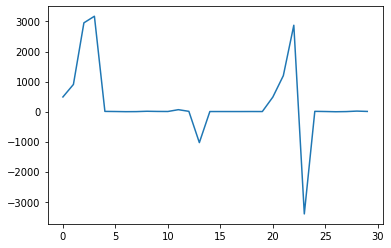

In [45]:
import matplotlib.pyplot as plt
plt.plot(perceptron.w)
plt.show()
# w values are changing (no more ones which were initialised)

# Proper model

In [0]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if(np.dot(self.w,x)>=self.b) else 0
  
  def predict(self,X):
    Y=[]
    for x in X:
      Y.append(self.model(x))
    return np.array(Y)

  def fit(self,X,Y):
    self.w = np.ones(X.shape[1]) # nXn where n is number of columns in X
    self.b = 0

    for i in range(epochs):
      for x,y in zip(X,Y,epochs=1):
        y_pred = self.model(x)
        if(y == 1 and y_pred == 0): #(y_pred = !y): wrong since y_pred could be either 1 or 0, but different steps have to be taken in each case
          self.w = self.w + x
          self.b += 1
        elif(y == 0 and y_pred ==1):
          self.w = self.w - x
          self.b -= 1